# Lesson 3.1 Monte Carlo Method
---

*Fun Fact*: The "Monte Carlo" in the Monte Carlo Method is named after the "Monte Carlo Casino" in Monaco! The naming has an intriguing link to the nature of the method – and you're about to discover why!



The **main idea** behind the Monte Carlo Method is **simulation**. That is, you will play the game multiple time to get a better understanding of what might happen when you perform a certain **action**. The more you play, the more likely that you will figure out the **best** move to take!

---

Let us start with the following fun example of estimating $\pi$ (if you don't know what $\pi$ is, search it up!)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets

def generate_quad_circle():
    # Generate theta values from 0 to pi/2
    theta = np.linspace(0, np.pi / 2, 100)

    # Calculate corresponding x and y coordinates for the quadrant
    x = np.cos(theta)
    y = np.sin(theta)

    # Create a new figure
    fig, ax = plt.subplots()

    # Plot the quadrant
    ax.plot(x, y, label="line")

    # Set the aspect ratio to be equal
    ax.set_aspect('equal')
    return fig, ax


def estimate_pi(num_points):
    points_inside_circle = 0
    points_inside_quadrant = 0
    x_pts_inside = np.array([])
    y_pts_inside = np.array([])
    x_pts_outside = np.array([])
    y_pts_outside = np.array([])

    for _ in range(num_points):
        # Generate random coordinates for the point within the square
        x = np.random.uniform(0, 1)
        y = np.random.uniform(0, 1)

        # Check if the point is inside the circle
        if (x - 0.5) ** 2 + (y - 0.5) ** 2 <= 1 ** 2:
            points_inside_circle += 1
            x_pts_inside = np.append(x_pts_inside, x)
            y_pts_inside = np.append(y_pts_inside, y)

        # Check if the point is outside the circle
        if x ** 2 + y ** 2 >= 1 ** 2:
            x_pts_outside = np.append(x_pts_outside, x)
            y_pts_outside = np.append(y_pts_outside, y)

        # Check if point is inside the quarant
        if x ** 2 + y ** 2 <= 1:
            points_inside_quadrant += 1

    # Calculate the estimated value of pi
    pi_estimate = 4 * (points_inside_quadrant / num_points)

    fig, ax = generate_quad_circle()
    ax.set_title('Estimation of $\pi$: '+ str(pi_estimate))
    fig.gca().plot(x_pts_inside, y_pts_inside, 'bo', label='Pts inside circle')
    fig.gca().plot(x_pts_outside, y_pts_outside, 'ro', label='Pts outside circle')
    fig.gca().legend()

    return fig

# Create a slider widget
num_points_slider = widgets.IntSlider(
    value=100,
    min=10,
    max=10000,
    step=1,
    description='# of Points:',
    continuous_update=False,
    readout=True
)

# Define a callback function to update the figure when the slider value changes
def update_figure(num_points):
    fig = estimate_pi(num_points)
    plt.show(fig)


# Register the callback function to the slider's value attribute
widgets.interact(update_figure, num_points=num_points_slider)


interactive(children=(IntSlider(value=100, continuous_update=False, description='# of Points:', max=10000, min…

<function __main__.update_figure(num_points)>

Feel free to try the slider and increase the number of points!

**What have you noticed? Do you see a trend?** As the number of points increased, the estimation of $\pi$ is getting **closer and closer** to its true value: 3.1415...!!!

**Question 3.1**: What effect does increasing the number of points do to our estimation of π?

**Question 3.2**: What role does *randomness* play in the Monte Carlo method?

**Question 3.3**: How can *Monte Carlo Method* be applied to playing a game such as "Super Mario" (if you don't know what "Super Mario" is, think of a game that you have played before)

We will use the following maze in the rest of the lesson.
 - I will start at state 0, and my goal is to reach state 8.
 - There is only 1 optimal path (fewest blocks to take)
 - When I am in a particular block, I have equal chance of entering any of the availble blocks

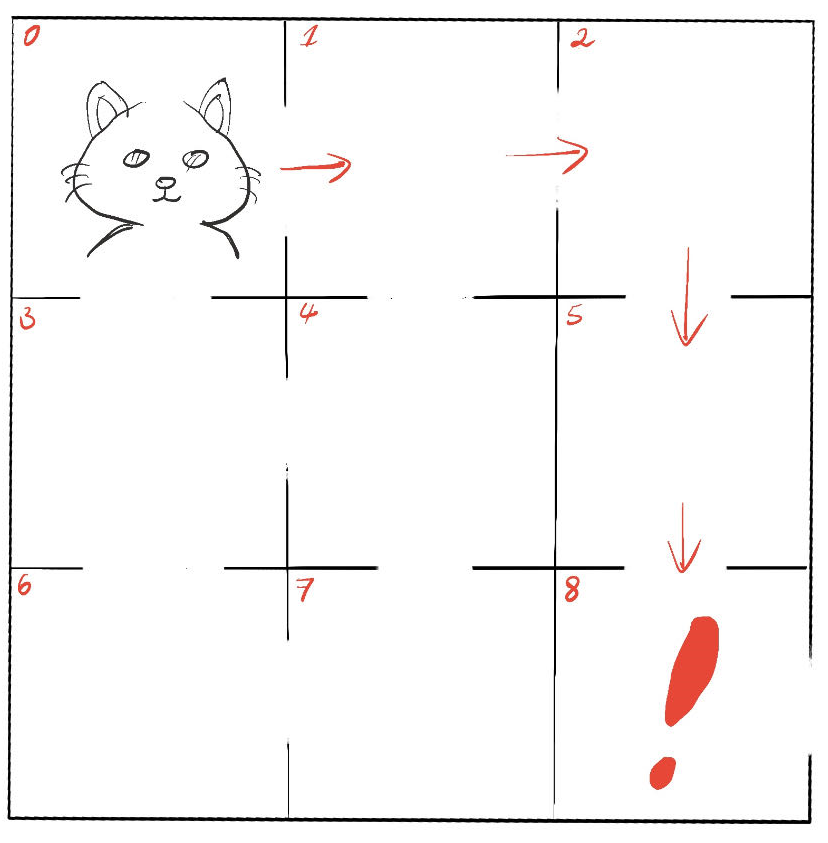

## Monte Carlo in RL
I will get a reward of 100 when I exit the maze and I don't know the layout of the maze. But I can learn by exploring! (E.g. Try the maze multiple times!!!)

In [44]:
import numpy as np

# Initialize the value of each state to 0
state_values = np.zeros(9)

# Set the reward for each state
rewards = np.array([0, 5, 5, -5, -5, 5, -5, -5, 100])

# Set the transition probabilities between states  (equal chance for the availble next states)
transition_probabilities = np.array([
    [  0, 1/2,   0, 1/2,   0,   0,   0,   0,   0],
    [1/3,   0, 1/3,   0, 1/3,   0,   0,   0,   0],
    [  0, 1/2,   0,   0,   0, 1/2,   0,   0,   0],
    [1/3,   0,   0,   0, 1/3,   0, 1/3,   0,   0],
    [  0, 1/3,   0, 1/3,   0,   0,   0, 1/3,   0],
    [  0,   0, 1/2,   0,   0,   0,   0,   0, 1/2],
    [  0,   0,   0, 1/2,   0,   0,   0, 1/2,   0],
    [  0,   0,   0,   0, 1/2,   0, 1/2,   0,   0],
    [  0,   0,   0,   0,   0,   0,   0,   0,   1]
])

# Set the discount factor
gamma = 0.9

# Initialize a counter for the total return and number of visits from each state
total_return = np.zeros(9)
num_visits = np.zeros(9)

# Run the Monte Carlo simulation
for _ in range(1000):
    # Start in a random state
    s = np.random.randint(9)

    # Initialize a list to store the states and rewards for this episode
    states = [s]
    rewards_episode = [rewards[s]]

    # Generate an episode
    while s != 8:
        # Choose a random action (move to the next state)
        s = np.random.choice(9, p=transition_probabilities[s])

        # Store the state and reward
        states.append(s)
        rewards_episode.append(rewards[s])

    # Calculate the return from each state and update the value of the state
    G = 0
    for t in reversed(range(len(states))):
        s = states[t]
        r = rewards_episode[t]
        G = gamma * G + r
        total_return[s] += G
        num_visits[s] += 1
        state_values[s] = total_return[s] / num_visits[s]

print(state_values)

[  1.61616556  15.84852326  41.8517036  -13.08098846  -9.30128276
  68.07530284 -19.12350213 -17.69236284 100.        ]


**Question 3.4**: What is our **policy** here? (Hint: check the code)

**Question 3.5**: Given that the **discount factor** determines how much do I value future rewards over immediate rewards, what does a high and low discount factor represents, respectively?

**Question 3.6**: What do you observed in the **state values** printed out? Is there a general trend in the values. If so, why do you think this trend exist?

# Lesson 3.2 Temporal Difference
---
 - Temporal Difference (TD) learning is a combination of **Monte Carlo** ideas and **[dynamic programming](https://www.geeksforgeeks.org/dynamic-programming/)** ideas.
 - Unlike Monte Carlo methods, which have to wait until the end of an episode to determine the increment to the value of a state, TD methods update the value of the state incrementally, at each time step.

Using the same game above, let's see TD in action!

In [38]:
import numpy as np

# Initialize the value of each state to 0
state_values = np.zeros(9)

# Set the reward for each state
rewards = np.array([0, 5, 5, -5, -5, 5, -5, -5, 100])

# Set the transition probabilities between states
transition_probabilities = np.array([
    [  0, 1/2,   0, 1/2,   0,   0,   0,   0,   0],
    [1/3,   0, 1/3,   0, 1/3,   0,   0,   0,   0],
    [  0, 1/2,   0,   0,   0, 1/2,   0,   0,   0],
    [1/3,   0,   0,   0, 1/3,   0, 1/3,   0,   0],
    [  0, 1/3,   0, 1/3,   0,   0,   0, 1/3,   0],
    [  0,   0, 1/2,   0,   0,   0,   0,   0, 1/2],
    [  0,   0,   0, 1/2,   0,   0,   0, 1/2,   0],
    [  0,   0,   0,   0, 1/2,   0, 1/2,   0,   0],
    [  0,   0,   0,   0,   0,   0,   0,   0,   1]
])

# Set the discount factor
gamma = 0.9
iterations = 10

# Run the TD learning algorithm
for _ in range(iterations):
    for s in range(9):
        # Calculate the value of the state
        state_values[s] = rewards[s] + gamma * np.sum(transition_probabilities[s] * state_values)

print(state_values)


[ 23.43141411  64.67498231 185.70920157   0.87455574  12.64517059
 364.22992066  -7.63598615  -2.745867   651.3215599 ]


**Question 3.7**: What do the **state values** represent?

And you observe a similar trend in the state values, right!!!

# Lesson 3.3 Q-Learning
---
Q-Learning is a **model-free** reinforcement learning algorithm (it is not trying to estimate something like what Monte Carlo and TD are doing using the transition probabilities, it is more of a *trial and error*). The goal of Q-learning is to learn a policy, which tells an agent what action to take under what circumstances.

Let's see how I can use Q-Learning to learn how to navigate the maze!

In [90]:
# Initialize the Q-table to 0
Q_table = np.zeros((9, 9))

# Initialize the value of each state to 0
state_values = np.zeros(9)

# Set the reward for each state
rewards = np.array([0, 5, 5, -5, -5, 5, -5, -5, 100])

# Set the transition probabilities between states
transition_probabilities = np.array([
    [  0, 1/2,   0, 1/2,   0,   0,   0,   0,   0],
    [1/3,   0, 1/3,   0, 1/3,   0,   0,   0,   0],
    [  0, 1/2,   0,   0,   0, 1/2,   0,   0,   0],
    [1/3,   0,   0,   0, 1/3,   0, 1/3,   0,   0],
    [  0, 1/3,   0, 1/3,   0,   0,   0, 1/3,   0],
    [  0,   0, 1/2,   0,   0,   0,   0,   0, 1/2],
    [  0,   0,   0, 1/2,   0,   0,   0, 1/2,   0],
    [  0,   0,   0,   0, 1/2,   0, 1/2,   0,   0],
    [  0,   0,   0,   0,   0,   0,   0,   0,   1]
])

# Set the discount factor
gamma = 0.9

# Set the learning rate
alpha = 0.1

# Set the exploration rate
epsilon = 0.1

# Run the Q-learning algorithm
for _ in range(100):
    # Start in a random state
    s = np.random.randint(9)

    while s != 8:
        # Identify valid actions
        valid_actions = np.where(transition_probabilities[s]>0)[0]

        # Choose an action
        if np.random.uniform(0, 1) < epsilon:
            # Explore: choose a random valid action
            a = np.random.choice(valid_actions)
        else:
            # Exploit: choose the valid action with the highest Q-value
            a = valid_actions[np.argmax(Q_table[s, valid_actions])]

        # Get the next state based on the action taken
        s_next = a

        # Get the reward for the action
        r = rewards[s_next]

        # Update the Q-value for the state-action pair
        Q_table[s, a] = Q_table[s, a] + alpha * (r + gamma * np.max(Q_table[s_next]) - Q_table[s, a])

        # Move to the next state
        s = s_next

Q_table

array([[ 0.        , 78.5338019 ,  0.        , 15.12784637,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [45.67456056,  0.        , 89.76966442,  0.        , 45.8276813 ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , 63.26016998,  0.        ,  0.        ,  0.        ,
        94.89242766,  0.        ,  0.        ,  0.        ],
       [56.15497938,  0.        ,  0.        ,  0.        , 10.01820535,
         0.        , -0.5       ,  0.        ,  0.        ],
       [ 0.        , 79.86476532,  0.        ,  4.65016934,  0.        ,
         0.        ,  0.        ,  0.17226222,  0.        ],
       [ 0.        ,  0.        , 58.00359033,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , 99.99314404],
       [ 0.        ,  0.        ,  0.        , 18.17321614,  0.        ,
         0.        ,  0.        ,  0.15812408,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , 45

In [92]:
cur_state = 0

for i in range(5):
  print(cur_state)
  cur_state = np.argmax(Q_table[cur_state])


0
1
2
5
8


Isn't this the path to solve the maze!!?

The **policy** that we use here is called the **epsilon-greedy strategy**!

- In this policy we will:
  - Explore (selects a random action) with $\epsilon$ probability
  - Exploit (selects the greedy action, the action with the HIGHEST value) with 1 - $\epsilon$ probability


We also used **Q-table** to store the value for a certain (state, action) pair, and these values are important when we decide our action (see the code)!

**Question 3.8**:  What is the role of the exploration rate?

# Lesson 3.4 Deep Q-Learning

In Deep-Q Learning, we will use a **deep neural network** to act as the **Q-table** ! (It is used when our observation space is huge enough that a Q-table will be too hard to store)

In [1]:
!pip install stable-baselines3[extra]==2.0.0
!pip install gymnasium==0.28.1

     -------------------------------------- 178.4/178.4 kB 5.4 MB/s eta 0:00:00
     ------------------------------------- 925.5/925.5 kB 14.8 MB/s eta 0:00:00
     --------------------------------------- 38.1/38.1 MB 32.8 MB/s eta 0:00:00
     ---------------------------------------- 239.7/239.7 kB ? eta 0:00:00
     --------------------------------------- 10.5/10.5 MB 32.7 MB/s eta 0:00:00
     ------------------------------------- 434.7/434.7 kB 26.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ------------------------------------- 952.4/952.4 kB 30.4 MB/s eta 0:00:00
     ------------------------------------- 895.7/895.7 kB 19.2 MB/s eta 0:00:00
     ------------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.10.0 requires libclang>=13.0.0, which is not installed.
tensorflow 2.10.0 requires tensorflow-io-gcs-filesystem>=0.23.1, which is not installed.


In [2]:
import gymnasium as gym
class MazeEnv(gym.Env):
    def __init__(self):
        super(MazeEnv, self).__init__()

        self.state_space = 9
        self.state = 0

        self.action_space = gym.spaces.Discrete(9)
        self.observation_space = gym.spaces.Box(low=0, high=8, shape=(1,), dtype=np.int32)

        # Set the reward for each state
        self.rewards = np.array([0, 5, 5, -5, -5, 5, -5, -5, 100])

        # Set the transition probabilities between states
        self.transition_probabilities = np.array([
          [  0, 1/2,   0, 1/2,   0,   0,   0,   0,   0],
          [1/3,   0, 1/3,   0, 1/3,   0,   0,   0,   0],
          [  0, 1/2,   0,   0,   0, 1/2,   0,   0,   0],
          [1/3,   0,   0,   0, 1/3,   0, 1/3,   0,   0],
          [  0, 1/3,   0, 1/3,   0,   0,   0, 1/3,   0],
          [  0,   0, 1/2,   0,   0,   0,   0,   0, 1/2],
          [  0,   0,   0, 1/2,   0,   0,   0, 1/2,   0],
          [  0,   0,   0,   0, 1/2,   0, 1/2,   0,   0],
          [  0,   0,   0,   0,   0,   0,   0,   0,   1]
         ])

    def step(self, action):
        valid_actions = np.where(self.transition_probabilities[self.state]>0)[0]

        if action in valid_actions:
            self.state = action
        else:
            # if invalid action, stay in the current state
            pass
        reward = self.rewards[self.state]
        done = self.state == 8
        return np.array([self.state]), reward, done, None, {}

    def reset(self, seed=None):
        if seed is not None:
            np.random.seed(seed)
        self.state = 0
        return np.array([self.state]) , {}


In [26]:
from stable_baselines3 import DQN

# Create the environment
env = MazeEnv()

# Create the agent
model = DQN('MlpPolicy', env, verbose=0)

# Train the agent
model.learn(total_timesteps=5000)

# model.observation_space
# # Print the best action in each state
for s in range(9):
    print(f"Best action in state {s}: {model.predict(np.array([s]))}")

Best action in state 0: (array(0, dtype=int64), None)
Best action in state 1: (array(0, dtype=int64), None)
Best action in state 2: (array(0, dtype=int64), None)
Best action in state 3: (array(0, dtype=int64), None)
Best action in state 4: (array(0, dtype=int64), None)
Best action in state 5: (array(0, dtype=int64), None)
Best action in state 6: (array(0, dtype=int64), None)
Best action in state 7: (array(0, dtype=int64), None)
Best action in state 8: (array(0, dtype=int64), None)


But sadly :), DQN does not work that well in this task since we have a small observation space and some constraints! In the challenge for this lesson, we will look at a case where DQN will work better!